In [1]:
import numpy as np
import os.path as osp
import uproot as ur
from glob import glob

In [2]:
debug = False
prefix = '/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/scripts' if debug else '/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output'

filesAIDA = []
for suffix in ['bbbbbb', 'cccccc', 'ssssss', 'dddddd', 'uuuuuu']:
    filesAIDA = filesAIDA + glob(f'{prefix}/AIDAFile_{suffix}*.root')

filesAIDA.sort()

filesFinalStates:list[str] =  []

for file in filesAIDA:
    dn = osp.dirname(file)
    bn = osp.basename(file)
    
    totalsuffix = bn.replace('AIDAFile_', '').replace('.root.root', '')
    p = osp.join(dn, f'FinalStates_{totalsuffix}.root')
    
    filesFinalStates.append(p)
    
print(list(zip(filesAIDA, filesFinalStates)))

[('/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_bbbbbb_0.root.root', '/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/FinalStates_bbbbbb_0.root'), ('/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_bbbbbb_1.root.root', '/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/FinalStates_bbbbbb_1.root'), ('/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_bbbbbb_10.root.root', '/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/FinalStates_bbbbbb_10.root'), ('/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_bbbbbb_11.root.root', '/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/FinalStates_bbbbbb_11.root'), ('/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_bbbbbb_12.root.root', '/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/FinalStates_bbbbbb_12.r

In [3]:
#fsf = ur.open('/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/scripts/FinalStates_zzh_bbbb.root')
aff = ur.open('/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_bbbbbb_1.root.root')
#np.sum(aff['JetTaggingComparison']['energy'].array() == aff['Jets']['JetEnergy'].array())

In [3]:
from zhh.analysis.FlavorTagging import parse_files, get_tot_length, plot_roc_two_cases, roc_plot_config, load_ftag_results

/cvmfs/sw.hsf.org/key4hep/releases/2024-10-03/x86_64-almalinux9-gcc14.2.0-opt/py-tqdm/4.66.3-gay4aw/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
length, y_true, tags, valid_jets_mask = parse_files(filesAIDA[0], filesFinalStates[0], exclude_pdgs=None)

print(np.unique(y_true, return_counts=True))
if length:
    tags1, tags2 = tags
    tags1 = tags1[valid_jets_mask]
    tags2 = tags2[valid_jets_mask]
    y_true = y_true[valid_jets_mask]
    length = len(y_true)

print(np.unique(y_true, return_counts=True))

(array([5], dtype=int32), array([19200]))
(array([5], dtype=int32), array([19200]))


In [5]:
y_true, tags, valid_jets_mask = load_ftag_results(filesAIDA, parse_kwargs={ 'exclude_pdgs': None })

/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_bbbbbb_3.root.root:  11%|█         | 11/101 [00:00<00:02, 34.43it/s] 

/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_cccccc_17.root.root:  30%|██▉       | 30/101 [00:01<00:02, 27.64it/s]

/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_cccccc_9.root.root:  38%|███▊      | 38/101 [00:01<00:01, 32.54it/s] 

/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_dddddd_5.root.root:  53%|█████▎    | 54/101 [00:01<00:01, 33.41it/s] 

/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_ssssss_16.root.root:  68%|██████▊   | 69/101 [00:02<00:01, 27.65it/s]

/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_uuuuuu_17.root.root:  87%|████████▋ | 88/101 [00:03<00:00, 30.29it/s]

/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTesting/output/AIDAFile_uuuuuu_9.root.root: 100%|██████████| 101/101 [00:03<00:00, 28.27it/s]


In [8]:
plot_defaults = roc_plot_config['options'].clone()
plot_defaults['title_pre'] = r'$6q$ flavortag sample: '
plot_defaults

[('xmin', 0),
 ('xmax', 1),
 ('ymin', 0),
 ('ymax', 1),
 ('yscale', linear),
 ('title_pre', $6q$ flavortag sample: )]

b (ID0, n=348432), c (ID1, n=344352)


b (ID0, n=348432), c (ID1, n=344352)
b (ID0, n=348432), uds (ID2, n=1105272)
b (ID0, n=348432), uds (ID2, n=1105272)


[<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>]

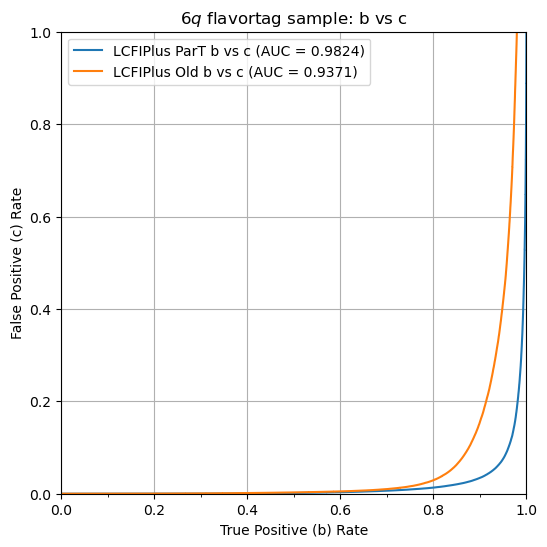

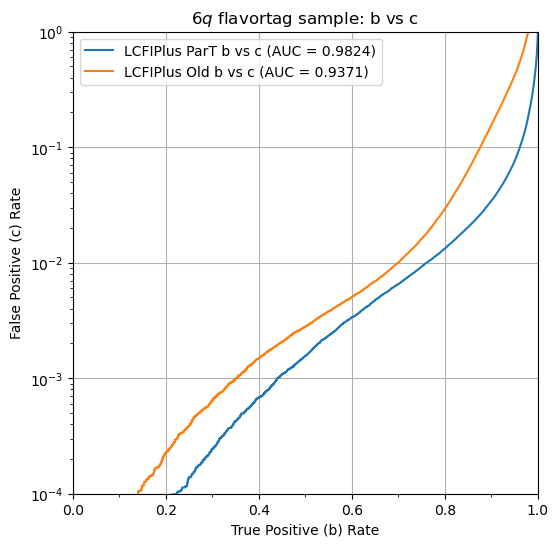

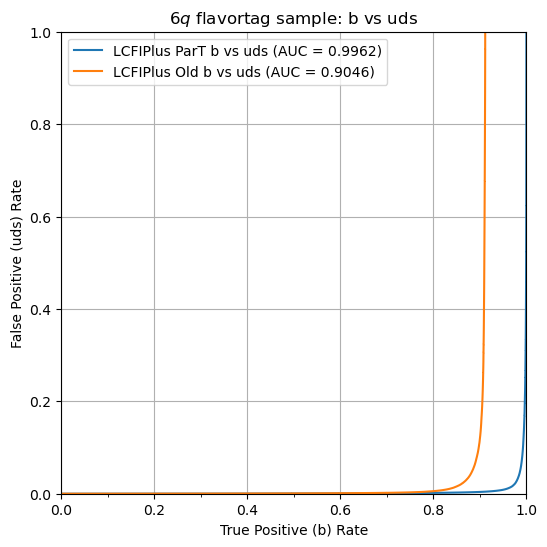

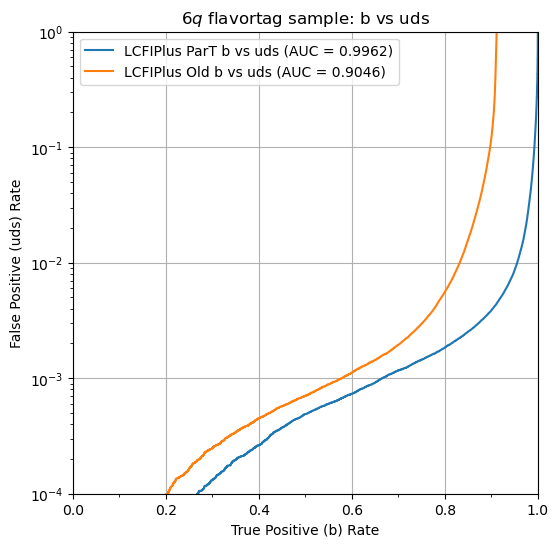

In [9]:
plot_roc_two_cases(y_true, [tags[0], tags[1]], ['LCFIPlus ParT', 'LCFIPlus Old'],
                   to_plot = [('b', 'c'), ('b', 'c'), ('b', 'uds'), ('b', 'uds')],
                   plot_defaults=plot_defaults,
                   plot_options={
                       1: { 'yscale': 'log', 'ymin': 1.E-4 },
                       3: { 'yscale': 'log', 'ymin': 1.E-4 }
})[0]